<a href="https://colab.research.google.com/github/jecampagne/cours_mallat_cdf/blob/main/scattering2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
! pip install -q kymatio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 KB 5.6 MB/s eta 0:00:00


In [41]:
! pip install -q PyWavelets

# Scattering 2D Transform

[kymatio doc](https://www.kymat.io/)

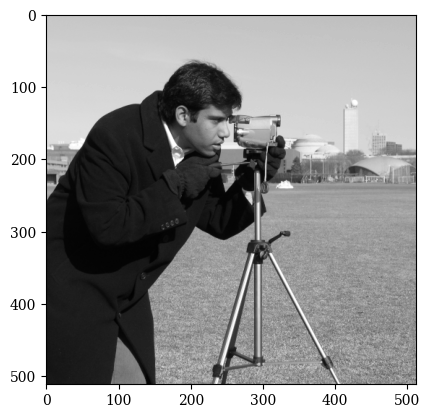

In [42]:
import pywt
import pywt.data
# Load image
original = pywt.data.camera()/255.  # transform pixel values in [0.,1.]
plt.imshow(original,cmap=plt.cm.gray)

In [43]:
height, width = original.shape

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from colorsys import hls_to_rgb
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import numpy as np
from kymatio.scattering2d.filter_bank import filter_bank
from scipy.fft import fft2


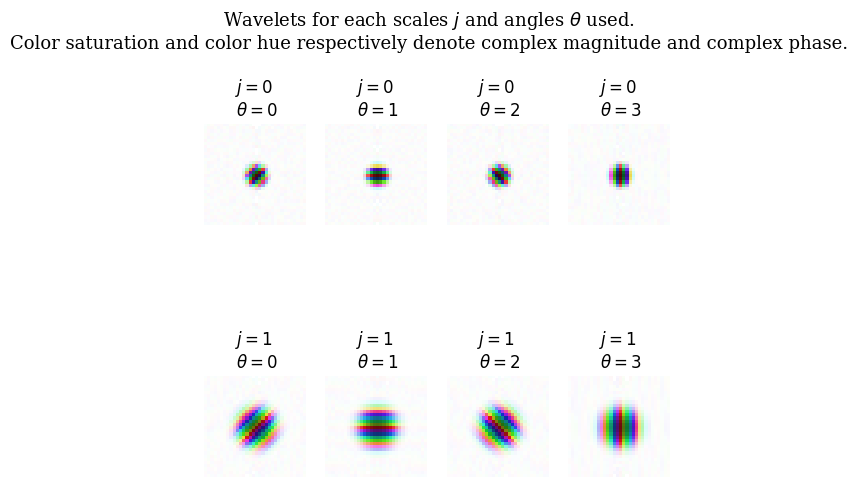

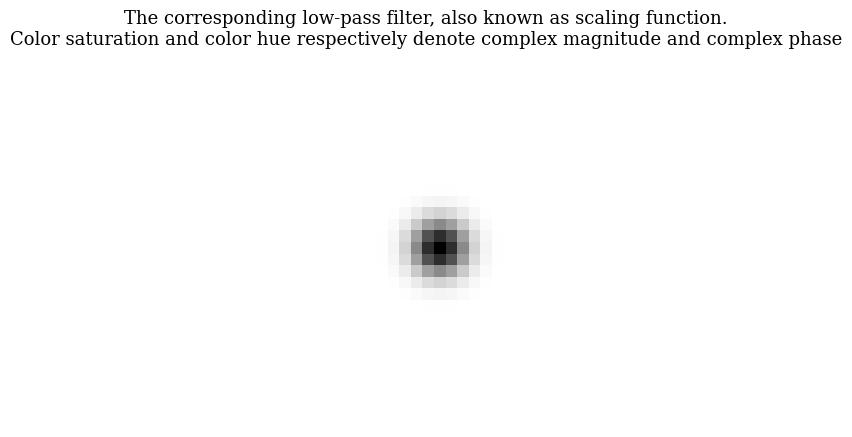

In [39]:
##############################################################################
# Initial parameters of the filter bank
# -------------------------------------
M = 32
J = 2
L = 4
filters_set = filter_bank(M, M, J, L=L)

###############################################################################
# Imshow complex images
# ---------------------
# Thanks to https://stackoverflow.com/questions/17044052/mathplotlib-imshow-complex-2d-array


def colorize(z):
    n, m = z.shape
    c = np.zeros((n, m, 3))
    c[np.isinf(z)] = (1.0, 1.0, 1.0)
    c[np.isnan(z)] = (0.5, 0.5, 0.5)

    idx = ~(np.isinf(z) + np.isnan(z))
    A = (np.angle(z[idx]) + np.pi) / (2*np.pi)
    A = (A + 0.5) % 1.0
    B = 1.0/(1.0 + abs(z[idx])**0.3)
    c[idx] = [hls_to_rgb(a, b, 0.8) for a, b in zip(A, B)]
    return c

###############################################################################
# Bandpass filters
# ----------------
# First, we display each wavelet according to its scale and orientation.
fig, axs = plt.subplots(J, L, sharex=True, sharey=True)
fig.set_figheight(6)
fig.set_figwidth(6)
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
i = 0
for filter in filters_set['psi']:
    f = filter["levels"][0]
    filter_c = fft2(f)
    filter_c = np.fft.fftshift(filter_c)
    axs[i // L, i % L].imshow(colorize(filter_c))
    axs[i // L, i % L].axis('off')
    axs[i // L, i % L].set_title(
        f"$j = {i // L}$ \n $\\theta={i % L}$")
    i = i+1

fig.suptitle((r"Wavelets for each scales $j$ and angles $\theta$ used."
              "\nColor saturation and color hue respectively denote complex "
              "magnitude and complex phase.\n "), fontsize=13)
fig.show()

###############################################################################
# Lowpass filter
# --------------
# We finally display the low-pass filter.
plt.figure()
plt.rc('font', family='serif')
plt.axis('off')
plt.set_cmap('gray_r')

f = filters_set['phi']["levels"][0]

filter_c = fft2(f)
filter_c = np.fft.fftshift(filter_c)
plt.suptitle(("The corresponding low-pass filter, also known as scaling "
              "function.\nColor saturation and color hue respectively denote "
              "complex magnitude and complex phase\n "), fontsize=13)
filter_c = np.abs(filter_c)
plt.imshow(filter_c)

plt.show()

In [40]:
from kymatio.numpy import Scattering2D

In [44]:
height, width

(512, 512)

In [62]:
scattering = Scattering2D(J=2, L=L, shape=(height, width), max_order=2)

In [63]:
coeffs= scattering(original)

In [72]:
coeffs.shape # 1 + L*J + L^2 J(J-1)/2 , N/2^2, N/2^2

(25, 128, 128)

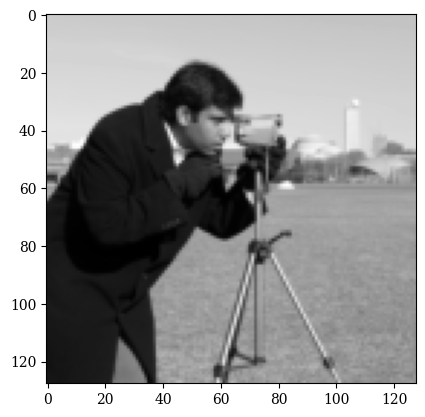

In [73]:
#low pass filter 
plt.imshow(coeffs[0],cmap=plt.cm.gray)

# Wavelet Coeffs: first level
$$
|x\ast Ψ_{j,\theta}| \qquad j=\{1,2\} \quad \mathrm{and}\quad \theta=\{1,2,3,4\}
$$


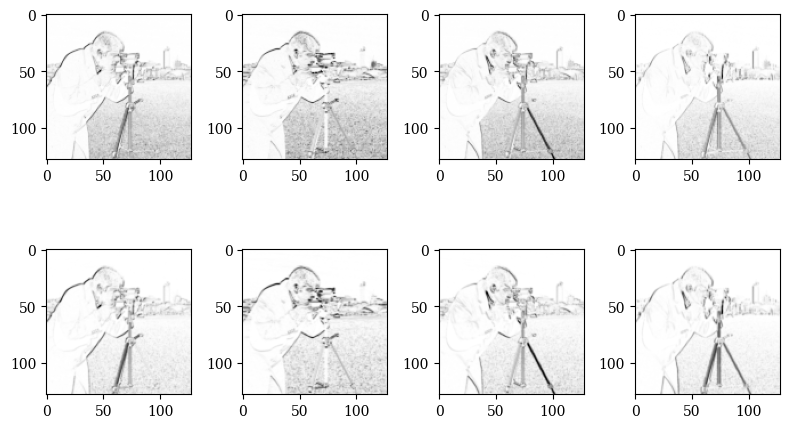

In [71]:
fig = plt.figure(figsize=(8, 5))
for i, a in enumerate(coeffs[1:9]):
    ax = fig.add_subplot(2, 4, i + 1)
    ax.imshow(a, interpolation=None, cmap=plt.cm.gray_r)
#    ax.set_title(titles[i], fontsize=10)
#    ax.set_xticks([])
#    ax.set_yticks([])

fig.tight_layout()
plt.show()

# Wavelet Coeffs: second level
$$
||x\ast Ψ_{j,\theta}| \ast  Ψ_{j^\prime,\theta^\prime}|  \qquad j=\{1,2\},\ j^\prime<j \quad \mathrm{and}\quad \theta,\theta^\prime=\{1,2,3,4\}
$$


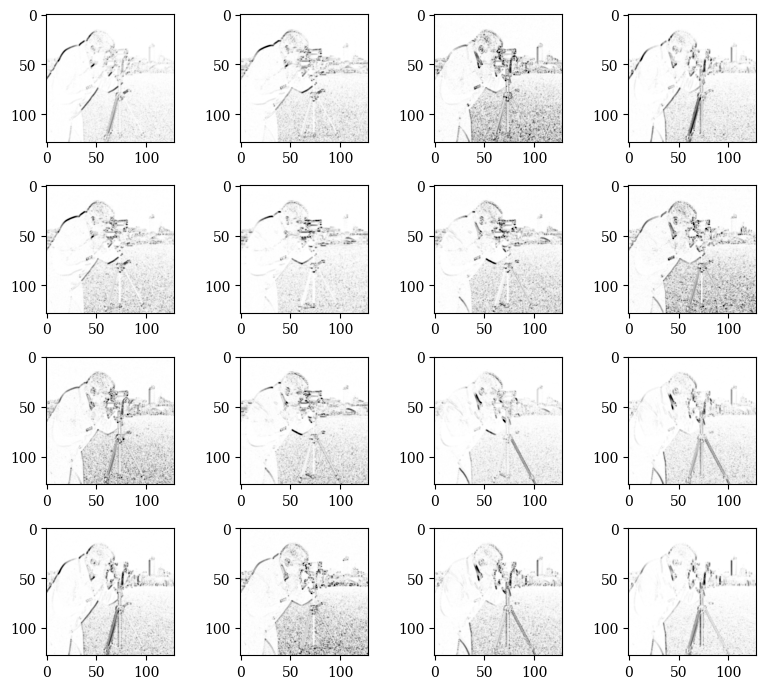

In [70]:
fig = plt.figure(figsize=(8, 7))
for i, a in enumerate(coeffs[9:]):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.imshow(a, interpolation=None, cmap=plt.cm.gray_r)
#    ax.set_title(titles[i], fontsize=10)
#    ax.set_xticks([])
#    ax.set_yticks([])

fig.tight_layout()
plt.show()